In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv
/kaggle/input/english-premier-league-and-championship-full-dataset/England 2 CSV.csv


In [2]:
pl_table = pd.read_csv("/kaggle/input/english-premier-league-and-championship-full-dataset/England CSV.csv")
pl_table

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


Step 1: Understand the data
* DataFrame Shape
* Head and Tail
* dtypes
* describe

In [3]:
pl_table.shape

(12153, 25)

In [4]:
pl_table.head(10)


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
5,15/01/2025,2024/25,Arsenal,Tottenham,2,1,H,2.0,1.0,H,S Hooper,14.0,10.0,4.0,2.0,16.0,9.0,10.0,4.0,3.0,1.0,0.0,0.0,20250115,Premier League
6,14/01/2025,2024/25,Brentford,Man City,2,2,D,0.0,0.0,D,A Taylor,18.0,21.0,6.0,8.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,20250114,Premier League
7,14/01/2025,2024/25,Chelsea,Bournemouth,2,2,D,1.0,0.0,H,R Jones,26.0,7.0,10.0,3.0,15.0,16.0,9.0,3.0,2.0,3.0,0.0,0.0,20250114,Premier League
8,14/01/2025,2024/25,West Ham,Fulham,3,2,H,2.0,0.0,H,C Pawson,4.0,21.0,3.0,5.0,9.0,18.0,0.0,3.0,3.0,3.0,0.0,0.0,20250114,Premier League
9,14/01/2025,2024/25,Nott'm Forest,Liverpool,1,1,D,1.0,0.0,H,C Kavanagh,6.0,23.0,3.0,7.0,7.0,10.0,0.0,9.0,2.0,1.0,0.0,0.0,20250114,Premier League


In [5]:
pl_table.tail(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12152,14/08/1993,1993/94,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


In [6]:
pl_table.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')

In [7]:
pl_table.dtypes 

Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object

In [8]:
pl_table.describe()

,FTH Goals,FTA Goals,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order
count,12153.000000,12153.000000,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04
mean,1.531309,1.160948,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07
std,1.306927,1.147714,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07


In [9]:
#check for null values
pl_table.isna().sum()

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

In [10]:
pl_table_subset = pl_table[['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',]]

pl_table_subset.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12152,14/08/1993,1993/94,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#pl_table_subset.loc[:, 'Date']= pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')
#pl_table_subset['Date'] = pd.to_datetime(pl_table_subset['Date'])

pl_table_subset.loc[:, 'Date']= pd.to_datetime(pl_table_subset['Date'], format='%d/%m/%Y')
pl_table_subset.dtypes

Date          object
Season        object
HomeTeam      object
AwayTeam      object
FTH Goals      int64
FTA Goals      int64
FT Result     object
HTH Goals    float64
HTA Goals    float64
HT Result     object
Referee       object
H Shots      float64
A Shots      float64
H SOT        float64
A SOT        float64
H Fouls      float64
A Fouls      float64
H Corners    float64
A Corners    float64
H Yellow     float64
A Yellow     float64
H Red        float64
A Red        float64
dtype: object

In [12]:
pl_table_subset.dtypes

Date          object
Season        object
HomeTeam      object
AwayTeam      object
FTH Goals      int64
FTA Goals      int64
FT Result     object
HTH Goals    float64
HTA Goals    float64
HT Result     object
Referee       object
H Shots      float64
A Shots      float64
H SOT        float64
A SOT        float64
H Fouls      float64
A Fouls      float64
H Corners    float64
A Corners    float64
H Yellow     float64
A Yellow     float64
H Red        float64
A Red        float64
dtype: object

In [13]:
pl_table_subset.loc[pl_table_subset.duplicated()]

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red


In [14]:
pl_table_subset.isna().sum()

Date            0
Season          0
HomeTeam        0
AwayTeam        0
FTH Goals       0
FTA Goals       0
FT Result       0
HTH Goals     924
HTA Goals     924
HT Result     924
Referee      2824
H Shots      2824
A Shots      2824
H SOT        2824
A SOT        2824
H Fouls      2824
A Fouls      2824
H Corners    2824
A Corners    2824
H Yellow     2824
A Yellow     2824
H Red        2824
A Red        2824
dtype: int64

In [15]:
pl_table_subset.loc[(pl_table_subset['Referee'].isna())]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
9329,2000-05-14 00:00:00,1999/00,Everton,Middlesbrough,0,2,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9330,2000-05-14 00:00:00,1999/00,Southampton,Wimbledon,2,0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9331,2000-05-14 00:00:00,1999/00,Newcastle,Arsenal,4,2,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9332,2000-05-14 00:00:00,1999/00,Bradford,Liverpool,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9333,2000-05-14 00:00:00,1999/00,Watford,Coventry,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,1993-08-14 00:00:00,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12149,1993-08-14 00:00:00,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,1993-08-14 00:00:00,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12151,1993-08-14 00:00:00,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# gives me all the games where man city was the home team.
temp  = (pl_table['HomeTeam']== 'Leicester').sum()
print(temp)


pl_table.loc[(pl_table['HomeTeam']=='Man City') & (pl_table['FTA Goals'] >= 4)]


336


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
95,23/11/2024,2024/25,Man City,Tottenham,0,4,A,0.0,2.0,A,J Brooks,23.0,9.0,5.0,7.0,19.0,9.0,9.0,3.0,4.0,2.0,0.0,0.0,20241123,Premier League
1704,27/09/2020,2020/21,Man City,Leicester,2,5,A,1.0,1.0,D,M Oliver,16.0,7.0,5.0,7.0,13.0,8.0,3.0,4.0,1.0,3.0,0.0,0.0,20200927,Premier League
3502,21/11/2015,2015/16,Man City,Liverpool,1,4,A,1.0,3.0,A,J Moss,11.0,14.0,3.0,9.0,5.0,13.0,11.0,5.0,0.0,3.0,0.0,0.0,20151121,Premier League
8297,22/02/2003,2002/03,Man City,Arsenal,1,5,A,0.0,4.0,A,P Durkin,18.0,9.0,12.0,9.0,7.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,20030222,Premier League
9012,11/04/2001,2000/01,Man City,Arsenal,0,4,A,0.0,4.0,A,Neale Barry,7.0,15.0,2.0,8.0,10.0,8.0,7.0,3.0,2.0,0.0,0.0,0.0,20010411,Premier League
9107,13/01/2001,2000/01,Man City,Leeds,0,4,A,0.0,1.0,A,Mike Dean,5.0,10.0,3.0,6.0,23.0,17.0,4.0,5.0,5.0,3.0,0.0,0.0,20010113,Premier League
9127,30/12/2000,2000/01,Man City,Charlton,1,4,A,0.0,2.0,A,Clive Wilkes,8.0,13.0,1.0,8.0,11.0,14.0,7.0,4.0,1.0,2.0,0.0,0.0,20001230,Premier League


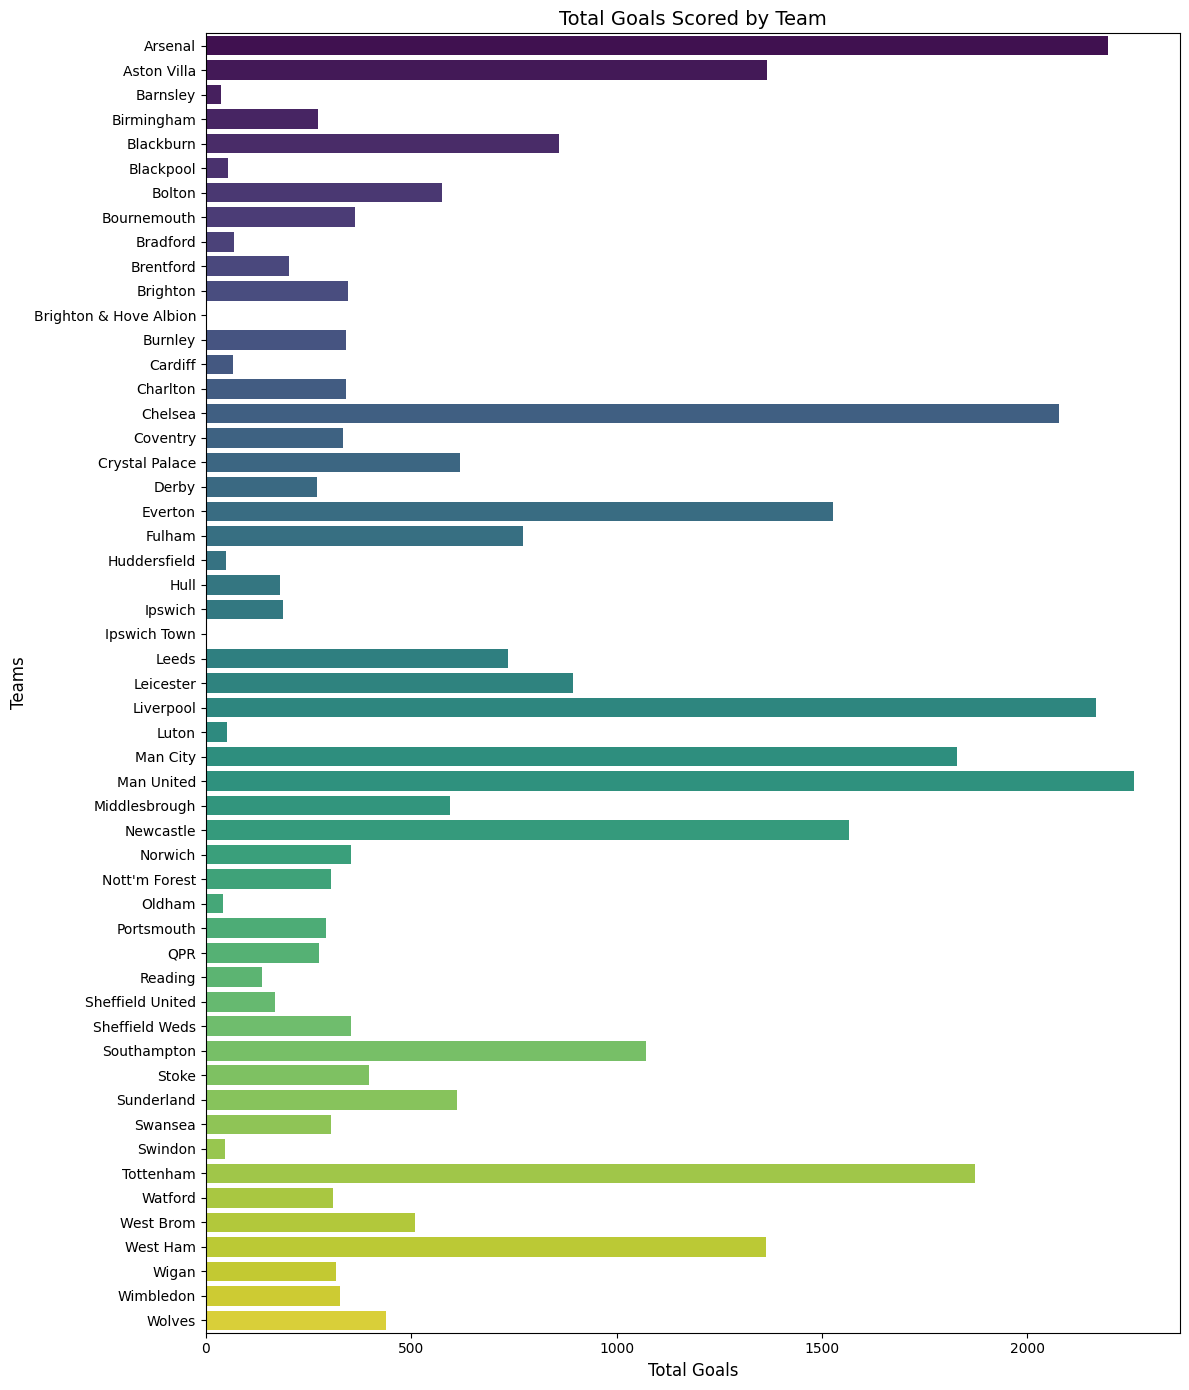

In [17]:
home_goals = pl_table.groupby('HomeTeam')['FTH Goals'].sum()
away_goals = pl_table.groupby('AwayTeam')['FTA Goals'].sum()
total_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)



# Create a new column witht the total, setting axis to one, uses the row
total_goals['Total'] = total_goals.sum(axis=1) # Sum home + away goals


# Reset index to turn team names into a column, seaborn needs a column for the y axis, currenty team is the index. We'll need to reindex the df
total_goals = total_goals.reset_index().rename(columns={'index': 'Team'})


# Set figure size (reduce height for better readability)
plt.figure(figsize=(12, 14))

# Create the barplot
sns.barplot(
    data=total_goals, 
    y='Team', 
    x='Total', 
    palette='viridis'  # Use a single palette for better clarity
)

# Titles and labels
plt.title('Total Goals Scored by Team', fontsize=14)
plt.xlabel('Total Goals', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Question I want to answer how many goals were scored by decade

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


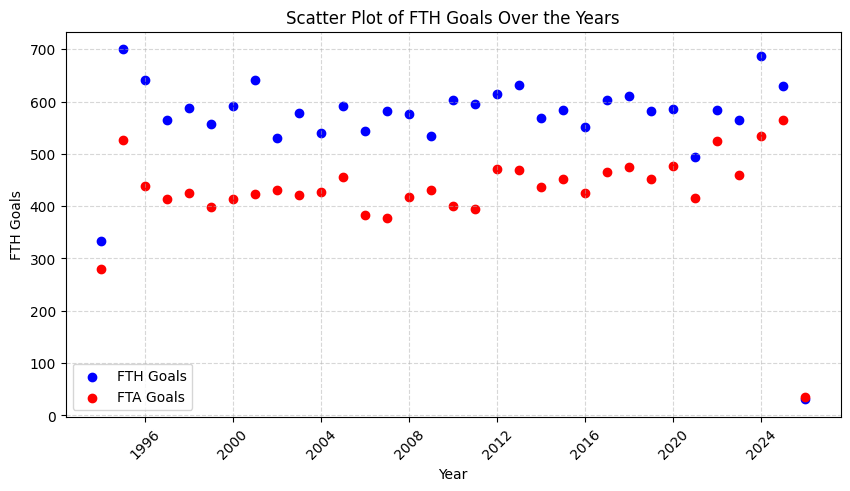

In [18]:
#pl_table_subset.loc[:,'Decade'] = ((pl_table_subset['Date'].dt.year - 1990) // 10 ) * 10 + 1990
data = pl_table_subset.groupby(pd.Grouper(key='Date', axis=0, freq='YE'))['FTH Goals'].sum()
data_away = pl_table_subset.groupby(pd.Grouper(key='Date', axis=0, freq='YE'))['FTA Goals'].sum()
#print(data)
#print(data_away)

plt.figure(figsize=(10, 5))
plt.scatter(data.index, data.values, color='b', label=data.name)
plt.scatter(data_away.index, data_away.values, color='r', label=data_away.name)
plt.xlabel("Year")
plt.ylabel(data.name)
plt.title(f"Scatter Plot of {data.name} Over the Years")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Show the plot
plt.show()


In [19]:
#goals_by_decade = pl_table_subset.groupby('Decade')['FTH Goals'].sum()
#print(goals_by_decade)



Chart a graph of the goals scored over the years